## LOAN DEFAULT PREDICTION

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [2]:
train_dg= pd.read_csv("traindemographics.csv")
train_dg

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013749,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary


In [3]:
train_pf= pd.read_csv("trainperf.csv")
train_pf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad


In [4]:
train_pv= pd.read_csv("trainprevloans.csv")
train_pv

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


In [5]:
test_dg= pd.read_csv("testdemographics.csv")
test_dg

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN
...,...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,1976-04-13 00:00:00.000000,Savings,3.481190,6.442728,GT Bank,NaN,Permanent,NaN
1483,8a858e245c214660015c3397e4db389a,1990-10-24 00:00:00.000000,Savings,4.738209,8.179723,GT Bank,NaN,Permanent,NaN
1484,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12 00:00:00.000000,Savings,3.424825,6.455802,First Bank,NaN,Permanent,NaN
1485,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23 00:00:00.000000,Savings,3.318851,7.113212,FCMB,NaN,Permanent,NaN


In [6]:
test_pf= pd.read_csv("testperf.csv")
test_pf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15,NaN
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30,NaN
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60,NaN
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90,NaN


In [7]:
test_pv= pd.read_csv("testprevloans.csv")
test_pv

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,2017-05-09 00:00:00.000000,2017-05-02 22:11:54.000000
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,2017-05-02 00:00:00.000000,2017-04-25 19:17:33.000000
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,2017-07-26 00:00:00.000000,2017-07-13 13:02:34.000000
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,2017-06-02 00:00:00.000000,2017-06-01 21:50:07.000000


## Merging the Dataset

In [8]:
test_pf= test_pf.drop(["creationdate","approveddate","referredby"], axis= 1)

In [9]:
train_pf= train_pf.drop(["referredby"], axis= 1)

In [10]:
train_bank= pd.merge(train_pf, train_pv["firstduedate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_pv["closeddate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_pv["firstrepaiddate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["birthdate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["longitude_gps"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["latitude_gps"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["bank_account_type"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["employment_status_clients"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["level_of_education_clients"], left_index= True, right_index= True)
                                        
train_bank
#Intuitively, train_pf variables are seen to be more important for our prediction
#so we added useful columns from the other train files into the train_pf file

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,closeddate,firstrepaiddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,2016-09-14 00:00:00.000000,2016-09-01 16:06:48.000000,2016-09-01 15:51:43.000000,1973-10-10 00:00:00.000000,3.319219,6.528604,Savings,NaN,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,2017-05-30 00:00:00.000000,2017-05-28 14:44:49.000000,2017-05-26 00:00:00.000000,1986-01-21 00:00:00.000000,3.325598,7.119403,Savings,Permanent,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,2017-04-04 00:00:00.000000,2017-04-26 22:18:56.000000,2017-04-26 22:03:47.000000,1987-04-01 00:00:00.000000,5.746100,5.563174,Savings,NaN,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,2017-04-24 00:00:00.000000,2017-04-24 01:35:52.000000,2017-04-24 00:48:43.000000,1991-07-19 00:00:00.000000,3.362850,6.642485,Savings,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,2017-07-03 00:00:00.000000,2017-07-14 21:18:43.000000,2017-07-14 21:08:35.000000,1982-11-22 00:00:00.000000,8.455332,11.971410,Savings,Permanent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25.000000,2017-07-28 11:00:18.000000,20000.0,24500.0,30,Good,2017-04-04 00:00:00.000000,2017-04-02 20:09:20.000000,2017-04-02 19:54:11.000000,1985-12-13 00:00:00.000000,3.236753,7.030168,Other,Permanent,Graduate
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26.000000,2017-07-28 06:57:16.000000,20000.0,24500.0,30,Good,2017-07-10 00:00:00.000000,2017-07-10 15:52:41.000000,2017-07-10 15:42:32.000000,1982-07-01 00:00:00.000000,7.013749,4.875662,Savings,NaN,NaN
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01.000000,2017-07-15 12:34:53.000000,10000.0,11500.0,15,Good,2017-02-03 00:00:00.000000,2017-02-02 09:11:42.000000,2017-02-02 08:56:32.000000,1989-09-26 00:00:00.000000,6.295530,7.092508,Savings,Permanent,NaN
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00.000000,2017-07-20 20:19:53.000000,30000.0,34500.0,30,Good,2017-06-22 00:00:00.000000,2017-07-07 14:57:38.000000,2017-06-28 19:18:40.000000,1985-09-06 00:00:00.000000,3.354206,6.539070,Savings,Permanent,Primary


In [11]:
test_bank= pd.merge(test_pf, test_pv["firstduedate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["closeddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["firstrepaiddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["creationdate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["approveddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["birthdate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["longitude_gps"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["latitude_gps"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["bank_account_type"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["employment_status_clients"], left_index= True, right_index= True)
test_bank=pd.merge(test_bank, test_dg["level_of_education_clients"], left_index=True, right_index= True)
test_bank
#we did the same thing for our test_pf file

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,firstduedate,closeddate,firstrepaiddate,creationdate,approveddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,2016-06-16 00:00:00.000000,2016-06-17 00:04:15.000000,2016-06-16 15:44:08.000000,2016-05-17 09:36:55.000000,2016-05-17 10:37:00.000000,1976-08-28 00:00:00.000000,5.296628,7.593965,Savings,Permanent,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,2017-03-06 00:00:00.000000,2017-03-02 16:22:58.000000,2017-03-02 16:07:47.000000,2017-02-04 20:28:52.000000,2017-02-04 21:28:59.000000,1978-06-23 00:00:00.000000,3.294513,6.596602,Savings,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,2017-04-03 00:00:00.000000,2017-04-02 00:44:24.000000,2017-04-01 21:29:46.000000,2017-03-04 09:28:16.000000,2017-03-04 10:28:22.000000,1984-04-04 00:00:00.000000,8.501912,7.729364,Savings,Permanent,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,2016-07-04 00:00:00.000000,2016-07-04 11:34:04.000000,2016-07-04 11:19:01.000000,2016-06-02 13:27:08.000000,2016-06-02 14:27:14.000000,1983-05-28 00:00:00.000000,3.318904,6.681595,Savings,Permanent,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,2016-05-31 00:00:00.000000,2016-06-02 00:02:58.000000,2016-06-01 15:22:34.000000,2016-05-16 08:13:04.000000,2016-05-16 09:13:12.000000,1982-03-29 00:00:00.000000,6.354624,4.949031,Savings,Self-Employed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,10000,11500.0,15,2017-04-24 00:00:00.000000,2017-05-24 15:49:31.000000,2017-04-25 10:28:06.000000,2017-03-24 17:27:29.000000,2017-03-24 18:27:35.000000,1980-08-05 00:00:00.000000,3.583009,6.493201,Savings,NaN,NaN
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,10000,13000.0,30,2017-07-10 00:00:00.000000,2017-07-08 05:10:32.000000,2017-07-08 05:00:21.000000,2017-06-08 16:02:26.000000,2017-06-08 17:03:35.000000,1994-02-25 00:00:00.000000,3.838206,7.352298,Savings,Student,NaN
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,40000,48000.0,60,2017-04-19 00:00:00.000000,2017-04-05 22:22:44.000000,2017-04-05 22:07:36.000000,2017-04-03 18:48:30.000000,2017-04-03 19:48:38.000000,1978-07-30 00:00:00.000000,3.448487,6.435382,Savings,Permanent,NaN
1448,8a858e10570f2d65015717fcfec44996,301961483,14,60000,68100.0,90,2017-07-07 00:00:00.000000,2017-07-03 15:33:59.000000,2017-07-03 15:23:50.000000,2017-06-07 12:11:10.000000,2017-06-07 13:12:17.000000,1992-04-02 00:00:00.000000,7.036701,4.781278,Savings,Permanent,NaN


In [12]:
#checking the data information after we've successfully merged
train_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4345
Data columns (total 18 columns):
customerid                    4346 non-null object
systemloanid                  4346 non-null int64
loannumber                    4346 non-null int64
approveddate                  4346 non-null object
creationdate                  4346 non-null object
loanamount                    4346 non-null float64
totaldue                      4346 non-null float64
termdays                      4346 non-null int64
good_bad_flag                 4346 non-null object
firstduedate                  4346 non-null object
closeddate                    4346 non-null object
firstrepaiddate               4346 non-null object
birthdate                     4346 non-null object
longitude_gps                 4346 non-null float64
latitude_gps                  4346 non-null float64
bank_account_type             4346 non-null object
employment_status_clients     3698 non-null object
level_of_education_client

In [13]:
test_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 17 columns):
customerid                    1450 non-null object
systemloanid                  1450 non-null int64
loannumber                    1450 non-null int64
loanamount                    1450 non-null int64
totaldue                      1450 non-null float64
termdays                      1450 non-null int64
firstduedate                  1450 non-null object
closeddate                    1450 non-null object
firstrepaiddate               1450 non-null object
creationdate                  1450 non-null object
approveddate                  1450 non-null object
birthdate                     1450 non-null object
longitude_gps                 1450 non-null float64
latitude_gps                  1450 non-null float64
bank_account_type             1450 non-null object
employment_status_clients     1239 non-null object
level_of_education_clients    201 non-null object
dtypes: float64(3), int64(4)

In [14]:
#statistics
train_bank.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,3.019810e+08,5.169581,17801.426599,21250.540888,29.271744,4.626189,7.251356
std,1.342529e+04,3.650181,10745.166507,11941.240232,11.533411,7.184832,3.055052
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019692e+08,2.000000,10000.000000,13000.000000,30.000000,3.354953,6.470610
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.593302,6.621888
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.545220,7.425052
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [15]:
test_bank.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,3.019807e+08,5.088966,17482.758621,20874.664069,28.810345,4.485600,7.118636
std,1.339572e+04,3.665210,10585.420034,11726.584630,11.074839,6.058934,2.918113
min,3.019585e+08,2.000000,10000.000000,10500.000000,15.000000,-149.033700,-74.005974
25%,3.019687e+08,2.000000,10000.000000,13000.000000,30.000000,3.354858,6.481300
50%,3.019799e+08,4.000000,10000.000000,13000.000000,30.000000,3.580392,6.619610
75%,3.019929e+08,7.000000,20000.000000,24500.000000,30.000000,6.631921,7.432615
max,3.020040e+08,34.000000,60000.000000,68100.000000,90.000000,39.815590,40.665105


In [16]:
train_bank.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
systemloanid,1.000000,-0.046273,-0.056726,-0.061123,-0.065080,0.015890,-0.010882
loannumber,-0.046273,1.000000,0.832774,0.814711,0.406060,-0.025353,0.004455
loanamount,-0.056726,0.832774,1.000000,0.994375,0.559951,-0.028604,0.013974
totaldue,-0.061123,0.814711,0.994375,1.000000,0.628739,-0.028877,0.012885
termdays,-0.065080,0.406060,0.559951,0.628739,1.000000,-0.021596,0.018214
longitude_gps,0.015890,-0.025353,-0.028604,-0.028877,-0.021596,1.000000,-0.172954
latitude_gps,-0.010882,0.004455,0.013974,0.012885,0.018214,-0.172954,1.000000


# Data Preprocessing

In [17]:
train_bank.isnull().sum()
#Dealing with missing values

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
firstduedate                     0
closeddate                       0
firstrepaiddate                  0
birthdate                        0
longitude_gps                    0
latitude_gps                     0
bank_account_type                0
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [18]:
test_bank.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
loanamount                       0
totaldue                         0
termdays                         0
firstduedate                     0
closeddate                       0
firstrepaiddate                  0
creationdate                     0
approveddate                     0
birthdate                        0
longitude_gps                    0
latitude_gps                     0
bank_account_type                0
employment_status_clients      211
level_of_education_clients    1249
dtype: int64

In [19]:
train_bank["employment_status_clients"]= train_bank["employment_status_clients"].fillna("Permanent", axis= 0)
train_bank["level_of_education_clients"]= train_bank["level_of_education_clients"].fillna("Graduate", axis=0)

In [20]:
test_bank["employment_status_clients"]= test_bank["employment_status_clients"].fillna("Permanent", axis= 0)
test_bank["level_of_education_clients"]= test_bank["level_of_education_clients"].fillna("Graduate", axis= 0)

In [21]:
#percentage of good and bad 
train_bank.good_bad_flag.value_counts(normalize= True) *100

Good    78.301887
Bad     21.698113
Name: good_bad_flag, dtype: float64

In [22]:
bct_index= train_bank.groupby("bank_account_type").sum().reset_index()
bct_index

,bank_account_type,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Current,16910840245,278,895000.0,1062125.0,1515,270.662593,397.105742
1,Other,261213343965,4421,15400000.0,18338813.0,24975,4057.112313,6186.697267
2,Savings,1034285107908,17768,61070000.0,72953912.7,100725,15777.641015,24930.588750


In [23]:
esc_index= train_bank.groupby("employment_status_clients").sum().reset_index()
esc_index

,employment_status_clients,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Contract,302001209,2,10000.0,11500.0,15,4.528632,8.468787
1,Permanent,1145715543328,19606,67560000.0,80695888.2,111210,17555.111139,27650.581742
2,Retired,1207915014,15,60000.0,73500.0,105,19.660014,23.131409
3,Self-Employed,105089305004,1817,6165000.0,7316687.5,9900,1621.396506,2388.589244
4,Student,42881603334,693,2525000.0,3018000.0,4305,611.731209,1064.831137
5,Unemployed,17212924229,334,1045000.0,1239275.0,1680,292.988421,378.789439


In [24]:
lec_index= train_bank.groupby("level_of_education_clients").sum().reset_index()
lec_index

,level_of_education_clients,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Graduate,1261978433605,21573,74405000.0,88828850.7,122280,19425.375336,30314.579678
1,Post-Graduate,20534748836,357,1175000.0,1411125.0,2025,320.306088,486.975400
2,Primary,3019872827,63,210000.0,244750.0,255,47.144160,69.009079
3,Secondary,26876236850,474,1575000.0,1870125.0,2655,312.590337,643.827601


In [25]:
train_bank["birthdate"]= pd.to_datetime(train_bank["birthdate"])
train_bank["approveddate"]= pd.to_datetime(train_bank["approveddate"])
train_bank["creationdate"]= pd.to_datetime(train_bank["creationdate"])
train_bank["firstduedate"]= pd.to_datetime(train_bank["firstduedate"])
train_bank["firstrepaiddate"]= pd.to_datetime(train_bank["firstrepaiddate"])
train_bank["closeddate"]= pd.to_datetime(train_bank["firstrepaiddate"])
#Using the module datetime on the date features in order to change their data types

In [26]:
test_bank["birthdate"]= pd.to_datetime(test_bank["birthdate"])
test_bank["approveddate"]= pd.to_datetime(test_bank["approveddate"])
test_bank["creationdate"]= pd.to_datetime(test_bank["creationdate"])
test_bank["firstduedate"]= pd.to_datetime(test_bank["firstduedate"])
test_bank["firstrepaiddate"]= pd.to_datetime(test_bank["firstrepaiddate"])
test_bank["closeddate"]= pd.to_datetime(test_bank["closeddate"])
test_bank.dtypes

customerid                            object
systemloanid                           int64
loannumber                             int64
loanamount                             int64
totaldue                             float64
termdays                               int64
firstduedate                  datetime64[ns]
closeddate                    datetime64[ns]
firstrepaiddate               datetime64[ns]
creationdate                  datetime64[ns]
approveddate                  datetime64[ns]
birthdate                     datetime64[ns]
longitude_gps                        float64
latitude_gps                         float64
bank_account_type                     object
employment_status_clients             object
level_of_education_clients            object
dtype: object

In [27]:
from datetime import datetime
train_bank["birth"]= [datetime.timestamp(i) for i in train_bank.birthdate]
train_bank["approved"]= [datetime.timestamp(i) for i in train_bank.approveddate]
train_bank["creation"]= [datetime.timestamp(i) for i in train_bank.creationdate]
train_bank["duedate"]= [datetime.timestamp(i) for i in train_bank.firstduedate]
train_bank["repaiddate"]= [datetime.timestamp(i) for i in train_bank.firstrepaiddate]
train_bank["closed"]= [datetime.timestamp(i) for i in train_bank.closeddate]
train_bank
#used timestamp from datetime to convert the date features to tine in seconds

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,...,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,2016-09-14,...,6.528604,Savings,Permanent,Graduate,119055600.0,1.500967e+09,1.500964e+09,1.473808e+09,1.472742e+09,1.472742e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,2017-05-30,...,7.119403,Savings,Permanent,Graduate,506646000.0,1.499271e+09,1.499267e+09,1.496099e+09,1.495753e+09,1.495753e+09
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2017-04-04,...,5.563174,Savings,Permanent,Graduate,544230000.0,1.499349e+09,1.499346e+09,1.491260e+09,1.493241e+09,1.493241e+09
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,2017-04-24,...,6.642485,Savings,Permanent,Graduate,679878000.0,1.501178e+09,1.501175e+09,1.492988e+09,1.492991e+09,1.492991e+09
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,2017-07-03,...,11.971410,Savings,Permanent,Graduate,406767600.0,1.499122e+09,1.499118e+09,1.499036e+09,1.500063e+09,1.500063e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25,2017-07-28 11:00:18,20000.0,24500.0,30,Good,2017-04-04,...,7.030168,Other,Permanent,Graduate,503276400.0,1.501240e+09,1.501236e+09,1.491260e+09,1.491159e+09,1.491159e+09
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26,2017-07-28 06:57:16,20000.0,24500.0,30,Good,2017-07-10,...,4.875662,Savings,Permanent,Graduate,394326000.0,1.501225e+09,1.501221e+09,1.499641e+09,1.499698e+09,1.499698e+09
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01,2017-07-15 12:34:53,10000.0,11500.0,15,Good,2017-02-03,...,7.092508,Savings,Permanent,Graduate,622767600.0,1.500122e+09,1.500118e+09,1.486076e+09,1.486022e+09,1.486022e+09
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00,2017-07-20 20:19:53,30000.0,34500.0,30,Good,2017-06-22,...,6.539070,Savings,Permanent,Primary,494809200.0,1.500582e+09,1.500578e+09,1.498086e+09,1.498674e+09,1.498674e+09


In [28]:
test_bank["birth"]= [datetime.timestamp(i) for i in test_bank.birthdate]
test_bank["approved"]= [datetime.timestamp(i) for i in test_bank.approveddate]
test_bank["creation"] = [datetime.timestamp(i) for i in test_bank.creationdate]
test_bank["duedate"] = [datetime.timestamp(i) for i in test_bank.firstduedate]
test_bank["repaiddate"]= [datetime.timestamp(i) for i in test_bank.firstrepaiddate]
test_bank["closed"]= [datetime.timestamp(i) for i in test_bank.closeddate]
test_bank
#using the timestamp from datetime to convert the date features to time in seconds

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,firstduedate,closeddate,firstrepaiddate,creationdate,...,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,2016-06-16,2016-06-17 00:04:15,2016-06-16 15:44:08,2016-05-17 09:36:55,...,7.593965,Savings,Permanent,Graduate,210034800.0,1.463478e+09,1.463474e+09,1.466032e+09,1.466088e+09,1.466118e+09
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,2017-03-06,2017-03-02 16:22:58,2017-03-02 16:07:47,2017-02-04 20:28:52,...,6.596602,Savings,Permanent,Graduate,267404400.0,1.486240e+09,1.486237e+09,1.488755e+09,1.488467e+09,1.488468e+09
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,2017-04-03,2017-04-02 00:44:24,2017-04-01 21:29:46,2017-03-04 09:28:16,...,7.729364,Savings,Permanent,Graduate,449881200.0,1.488620e+09,1.488616e+09,1.491174e+09,1.491079e+09,1.491090e+09
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,2016-07-04,2016-07-04 11:34:04,2016-07-04 11:19:01,2016-06-02 13:27:08,...,6.681595,Savings,Permanent,Graduate,422924400.0,1.464874e+09,1.464870e+09,1.467587e+09,1.467628e+09,1.467628e+09
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,2016-05-31,2016-06-02 00:02:58,2016-06-01 15:22:34,2016-05-16 08:13:04,...,4.949031,Savings,Self-Employed,Graduate,386204400.0,1.463386e+09,1.463383e+09,1.464649e+09,1.464791e+09,1.464822e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,10000,11500.0,15,2017-04-24,2017-05-24 15:49:31,2017-04-25 10:28:06,2017-03-24 17:27:29,...,6.493201,Savings,Permanent,Graduate,334278000.0,1.490376e+09,1.490373e+09,1.492988e+09,1.493112e+09,1.495637e+09
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,10000,13000.0,30,2017-07-10,2017-07-08 05:10:32,2017-07-08 05:00:21,2017-06-08 16:02:26,...,7.352298,Savings,Student,Graduate,762130800.0,1.496938e+09,1.496934e+09,1.499641e+09,1.499486e+09,1.499487e+09
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,40000,48000.0,60,2017-04-19,2017-04-05 22:22:44,2017-04-05 22:07:36,2017-04-03 18:48:30,...,6.435382,Savings,Permanent,Graduate,270601200.0,1.491245e+09,1.491242e+09,1.492556e+09,1.491426e+09,1.491427e+09
1448,8a858e10570f2d65015717fcfec44996,301961483,14,60000,68100.0,90,2017-07-07,2017-07-03 15:33:59,2017-07-03 15:23:50,2017-06-07 12:11:10,...,4.781278,Savings,Permanent,Graduate,702169200.0,1.496838e+09,1.496834e+09,1.499382e+09,1.499092e+09,1.499092e+09


In [29]:
train_bank= train_bank.drop(["birthdate","creationdate","approveddate","firstduedate","firstrepaiddate","closeddate"], axis= 1)
#Dropping the columns from which time features were extracted

In [30]:
test_bank= test_bank.drop(["birthdate","creationdate","approveddate","firstduedate","firstrepaiddate","closeddate"], axis= 1)

# Data Visualization

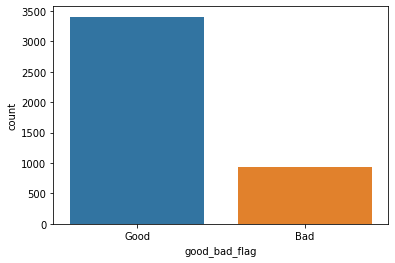

In [31]:
sns.countplot(x= "good_bad_flag", data= train_bank)
plt.show()
#few numbers of people default

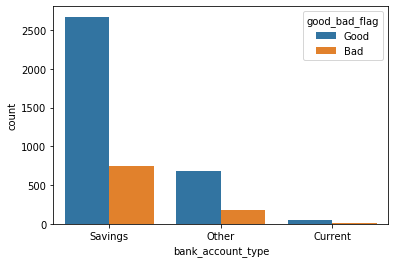

In [32]:
sns.countplot(x= "bank_account_type",hue= "good_bad_flag", data= train_bank)
plt.show()
#Most defaulters are Savings account holders

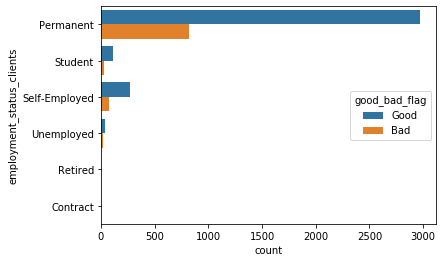

In [33]:
sns.countplot(y= "employment_status_clients", hue= "good_bad_flag", data= train_bank)
plt.show()
#Most people who request for loans are permanent workers

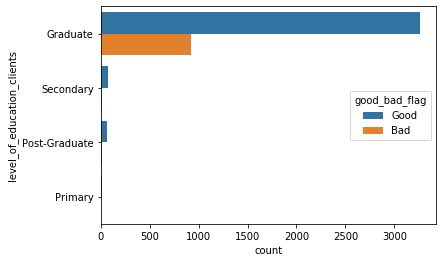

In [34]:
sns.countplot(y= "level_of_education_clients", hue= "good_bad_flag", data= train_bank)
plt.show()
#Majority are graduates

Good    77.961235
Bad     22.038765
Name: good_bad_flag, dtype: float64


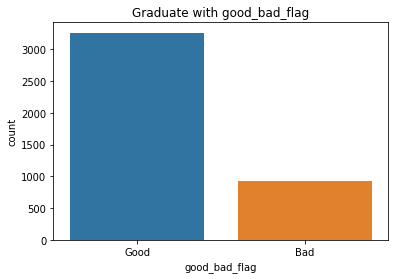

In [35]:
lec_grad= train_bank[train_bank["level_of_education_clients"]== "Graduate"]["good_bad_flag"]
print(lec_grad.value_counts(normalize= True)* 100)
sns.countplot(lec_grad)
plt.title("Graduate with good_bad_flag")
plt.show()

Good    85.393258
Bad     14.606742
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Secondary with gbf')

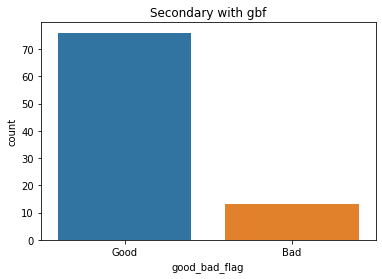

In [36]:
lec_sec= train_bank[train_bank["level_of_education_clients"]== "Secondary"]["good_bad_flag"]
print(lec_sec.value_counts(normalize= True)*100)
sns.countplot(lec_sec)
plt.title("Secondary with gbf")

Good    86.764706
Bad     13.235294
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Post-Graduate with gbf')

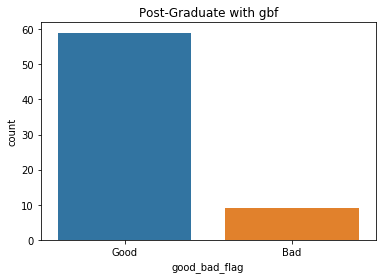

In [37]:
lec_pgrad= train_bank[train_bank["level_of_education_clients"]== "Post-Graduate"]["good_bad_flag"]
print(lec_pgrad.value_counts(normalize= True)*100)
sns.countplot(lec_pgrad)
plt.title("Post-Graduate with gbf")

Good    100.0
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Primary with gbf')

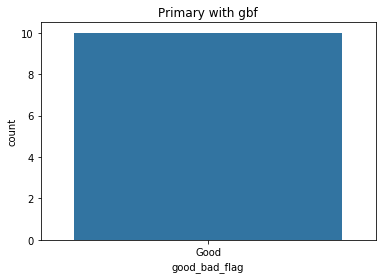

In [38]:
lec_pri= train_bank[train_bank["level_of_education_clients"]== "Primary"]["good_bad_flag"]
print(lec_pri.value_counts(normalize= True)*100)
sns.countplot(lec_pri)
plt.title("Primary with gbf")

Good    85.714286
Bad     14.285714
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Current with gbf')

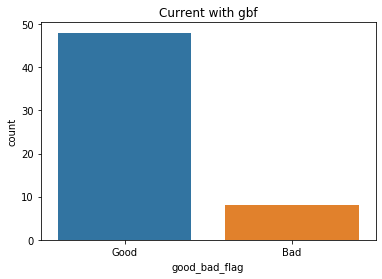

In [39]:
bct_current= train_bank[train_bank["bank_account_type"]== "Current"]["good_bad_flag"]
print(bct_current.value_counts(normalize= True)*100)
sns.countplot(bct_current)
plt.title("Current with gbf")

Good    78.014599
Bad     21.985401
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Savings with gbf')

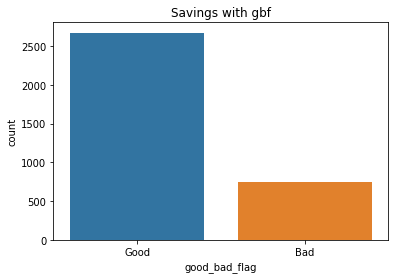

In [40]:
bct_savings= train_bank[train_bank["bank_account_type"]== "Savings"]["good_bad_flag"]
print(bct_savings.value_counts(normalize= True)*100)
sns.countplot(bct_savings)
plt.title("Savings with gbf")
                                                            

Good    78.281497
Bad     21.718503
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Permanent status with gbf')

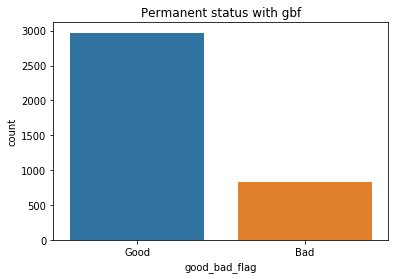

In [41]:
esc_perm= train_bank[train_bank["employment_status_clients"]== "Permanent"]["good_bad_flag"]
print(esc_perm.value_counts(normalize= True)*100)
sns.countplot(esc_perm)
plt.title("Permanent status with gbf")

Good    80.28169
Bad     19.71831
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Student status with gbf')

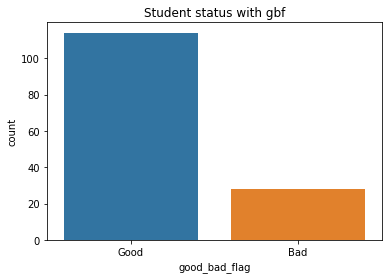

In [42]:
esc_stud= train_bank[train_bank["employment_status_clients"]== "Student"]["good_bad_flag"]
print(esc_stud.value_counts(normalize= True)*100)
sns.countplot(esc_stud)
plt.title("Student status with gbf")

Good    73.684211
Bad     26.315789
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Unemployed status with gbf')

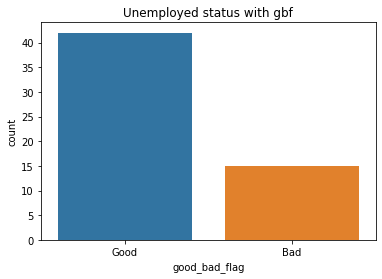

In [43]:
esc_unemployed= train_bank[train_bank["employment_status_clients"]== "Unemployed"]["good_bad_flag"]
print(esc_unemployed.value_counts(normalize= True)*100)
sns.countplot(esc_unemployed)
plt.title("Unemployed status with gbf")

Good    78.16092
Bad     21.83908
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Self Employed with gbf')

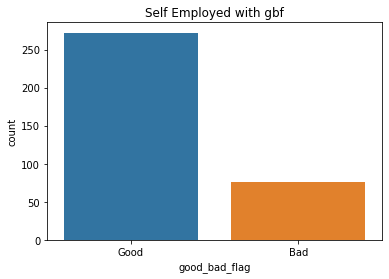

In [44]:
esc_self= train_bank[train_bank["employment_status_clients"]== "Self-Employed"]["good_bad_flag"]
print(esc_self.value_counts(normalize= True)*100)
sns.countplot(esc_self)
plt.title("Self Employed with gbf")

Good    100.0
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Retired')

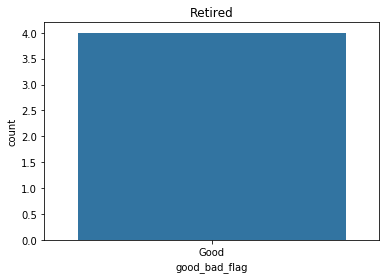

In [45]:
esc_ret= train_bank[train_bank["employment_status_clients"]== "Retired"]["good_bad_flag"]
print(esc_ret.value_counts(normalize= True)*100)
sns.countplot(esc_ret)
plt.title("Retired")

Good    100.0
Name: good_bad_flag, dtype: float64


Text(0.5, 1.0, 'Contract staatus with gbf')

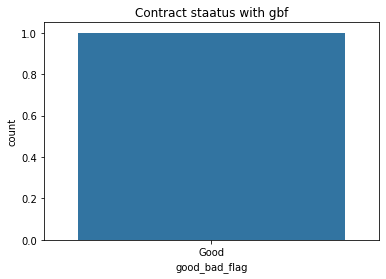

In [46]:
esc_contract= train_bank[train_bank["employment_status_clients"]== "Contract"]["good_bad_flag"]
print(esc_contract.value_counts(normalize= True)*100)
sns.countplot(esc_contract)
plt.title("Contract staatus with gbf")

# Feature Engineering

In [47]:
#for converting the categorical variables to numerical variables
Col= ("bank_account_type","good_bad_flag","level_of_education_clients","employment_status_clients")
for x in Col:
    le= LabelEncoder()
    train_bank[x]= le.fit_transform(train_bank[x].values)
train_bank.dtypes

customerid                     object
systemloanid                    int64
loannumber                      int64
loanamount                    float64
totaldue                      float64
termdays                        int64
good_bad_flag                   int32
longitude_gps                 float64
latitude_gps                  float64
bank_account_type               int32
employment_status_clients       int32
level_of_education_clients      int32
birth                         float64
approved                      float64
creation                      float64
duedate                       float64
repaiddate                    float64
closed                        float64
dtype: object

In [48]:
cols= ("bank_account_type","level_of_education_clients","employment_status_clients")
for y in cols:
    le= LabelEncoder()
    test_bank[y]= le.fit_transform(test_bank[y].values)
test_bank.dtypes

customerid                     object
systemloanid                    int64
loannumber                      int64
loanamount                      int64
totaldue                      float64
termdays                        int64
longitude_gps                 float64
latitude_gps                  float64
bank_account_type               int32
employment_status_clients       int32
level_of_education_clients      int32
birth                         float64
approved                      float64
creation                      float64
duedate                       float64
repaiddate                    float64
closed                        float64
dtype: object

In [49]:
train= train_bank.groupby(["customerid"]).mean().reset_index()
test= test_bank.groupby(["customerid"]).mean().reset_index()
test
#groupby on the customer id column and then resetting it as the index column

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a28afc7474813a40147639ec637156b,301997111,11,25000,27500.0,30,3.308835,6.666647,1,4,0,790815600.0,1.492621e+09,1.492617e+09,1.493852e+09,1.493903e+09,1.493904e+09
1,8a3735d5518aba7301518ac34413010d,301968180,7,20000,24500.0,30,3.944012,7.420548,1,3,0,495846000.0,1.487599e+09,1.487595e+09,1.490137e+09,1.489680e+09,1.489680e+09
2,8a76e7d443e6e97c0143ed099d102b1d,302000599,6,20000,24500.0,30,3.367945,6.576676,1,1,0,384908400.0,1.489011e+09,1.489007e+09,1.491520e+09,1.491315e+09,1.491316e+09
3,8a818823525dceef01525deda2480384,301961219,10,40000,48000.0,60,7.170351,4.400570,2,1,0,550018800.0,1.459936e+09,1.459933e+09,1.462489e+09,1.462378e+09,1.462403e+09
4,8a818926522ea5ef01523aff15c37482,301982498,3,20000,24500.0,30,8.335710,5.034218,2,1,0,638838000.0,1.495062e+09,1.495058e+09,1.496358e+09,1.495182e+09,1.495183e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fff5a36fe68015a3744f0021e89,301976259,6,20000,24500.0,30,3.479345,6.655474,2,1,0,474850800.0,1.493924e+09,1.493921e+09,1.496617e+09,1.496645e+09,1.496646e+09
1446,8aaae7a74400b28201441c8b62514150,302001482,4,10000,13000.0,30,3.367368,6.574438,2,1,0,430354800.0,1.462083e+09,1.462080e+09,1.464649e+09,1.464737e+09,1.464822e+09
1447,8aab10f748cf78ff0148d11fac1447a6,301989032,2,10000,13000.0,30,8.889184,9.842680,2,1,0,598143600.0,1.490892e+09,1.490888e+09,1.492124e+09,1.491417e+09,1.491417e+09
1448,8aab160f499477da014999ba2f0f578b,301992876,4,20000,23000.0,30,3.384717,6.601668,2,1,0,739753200.0,1.491161e+09,1.491158e+09,1.492384e+09,1.491224e+09,1.491225e+09


In [50]:
first_date= train_bank["creation"]
second_date= train_bank["approved"]
train_bank["time_diff"]= first_date - second_date
train_bank["time_diff"].head()
#created new features from the difference of when the loan is created and approved 

0   -3609.0
1   -3623.0
2   -3606.0
3   -3606.0
4   -3606.0
Name: time_diff, dtype: float64

In [51]:
first_date1= test_bank["creation"]
second_date1= test_bank["approved"]
test_bank["time_diff"]= first_date1 - second_date1
test_bank["time_diff"].head()

0   -3605.0
1   -3607.0
2   -3606.0
3   -3606.0
4   -3608.0
Name: time_diff, dtype: float64

# Modelling and Prediction Making

In [52]:
train_new= train.drop("customerid",axis= 1)

In [53]:
X= train_new.drop("good_bad_flag", axis= 1)
Y= train_new.good_bad_flag

In [54]:
train_x, val_x, train_y, val_y= train_test_split(X,Y,test_size= 0.2, random_state= 42)

In [55]:
Rf= RandomForestClassifier(n_estimators= 300, random_state= 0)
Ab= AdaBoostClassifier(n_estimators= 100, learning_rate= 0.1)
Rf.fit(train_x,train_y)
pred= Rf.predict(val_x)
Ab.fit(train_x, train_y)
preds= Ab.predict(val_x)
print("RF's accuracy score:",accuracy_score(pred,val_y))
print("Ab's accuracy score:", accuracy_score(preds, val_y))

RF's accuracy score: 0.7954022988505747
Ab's accuracy score: 0.8022988505747126


In [56]:
gbr= GradientBoostingClassifier(learning_rate= 0.1, random_state= 0, n_estimators= 50)
gbr.fit(train_x, train_y)
prd= gbr.predict(val_x)

print("GBR's accuracy score:",accuracy_score(val_y, prd))

GBR's accuracy score: 0.8022988505747126


In [57]:
train.shape

(4346, 18)

In [58]:
test.shape

(1450, 17)

In [59]:
#score= cross_val_score(Ab, X,y, cv= 5)
#score

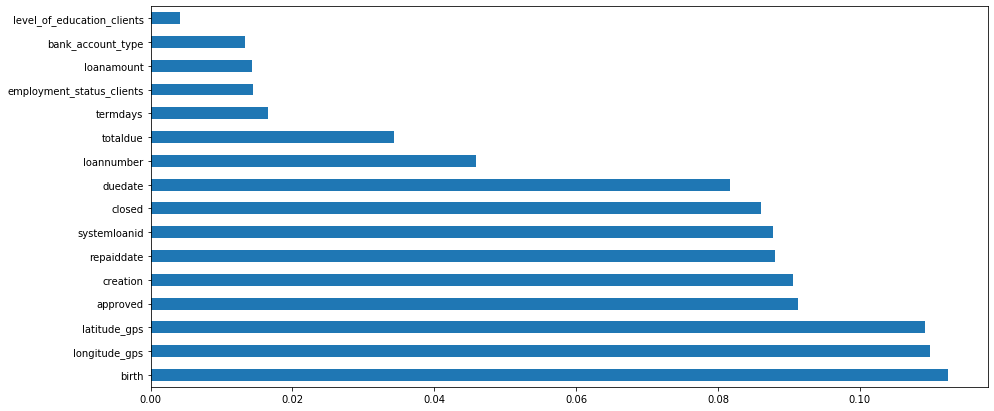

In [60]:
#feature importance for Random ForestClassifier

%matplotlib inline 
plt.figure(figsize=(15,7))
feat_importances = pd.Series(Rf.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [61]:
gbr.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Confusion Matrix

[[  7 165]
 [ 13 685]]


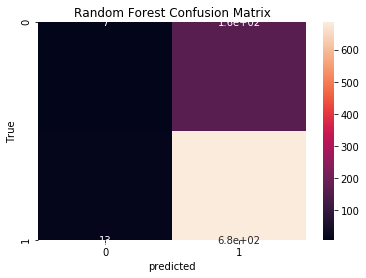

<Figure size 720x432 with 0 Axes>

In [62]:
ax= plt.subplot()
cm= confusion_matrix(val_y, pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True");
ax.set_title("Random Forest Confusion Matrix");

[[  0 172]
 [  0 698]]


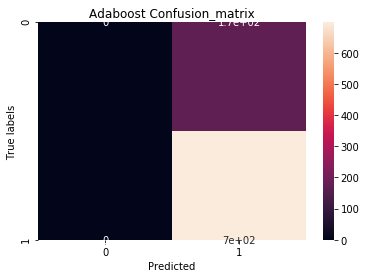

<Figure size 720x432 with 0 Axes>

In [63]:
ax= plt.subplot()
dm= confusion_matrix(val_y,preds)
print(dm)
sns.heatmap(dm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
plt.figure(figsize=(10,6))
ax.set_xlabel('Predicted');ax.set_ylabel('True labels'); 
ax.set_title('Adaboost Confusion_matrix'); 


[[  1 171]
 [  1 697]]


Text(0.5, 1, 'Gradient Confusion mattix')

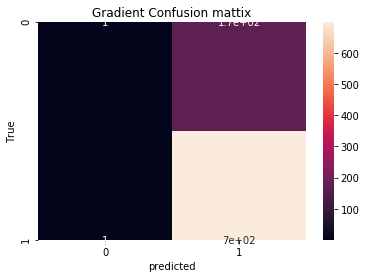

<Figure size 720x432 with 0 Axes>

In [64]:
ax= plt.subplot()
pm= confusion_matrix(val_y, prd)
print(pm)
sns.heatmap(pm, annot= True, ax= ax)

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True")
ax.set_title("Gradient Confusion mattix")

In [65]:
index = test.pop('customerid')

In [66]:
test_yhat= Ab.predict(test)

In [67]:
submission= pd.read_csv("SampleSubmission.csv")
submission

,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1
...,...,...
1445,8a858fff5a36fe68015a3744f0021e89,1
1446,8aaae7a74400b28201441c8b62514150,1
1447,8aab10f748cf78ff0148d11fac1447a6,1
1448,8aab160f499477da014999ba2f0f578b,1


In [68]:
submission.Good_Bad_flag= test_yhat
submission

,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1
...,...,...
1445,8a858fff5a36fe68015a3744f0021e89,1
1446,8aaae7a74400b28201441c8b62514150,1
1447,8aab10f748cf78ff0148d11fac1447a6,1
1448,8aab160f499477da014999ba2f0f578b,1


In [69]:
submission.to_csv("SCA.csv",index= False)